In [108]:
import pandas as pd
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [109]:
#Definición del dataset
datos = pd.read_csv(filepath_or_buffer = "/home/darok/Documentos/Escuela/IEDC/uteq/Evalucion2/diabetes_indiana.csv", sep=',', low_memory=False)

In [110]:
datos

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


In [111]:
data = datos.values
#X = todos los valores de todas las columnas, menos la ultima columna
#y = todos los valores de la ultima columna
# : = todos los valores
# -1 = ultima columna
X, y = data[:, :-1], data[:, -1]

In [112]:
data

array([[0.00e+00, 6.00e+00, 1.48e+02, ..., 6.27e-01, 5.00e+01, 1.00e+00],
       [1.00e+00, 1.00e+00, 8.50e+01, ..., 3.51e-01, 3.10e+01, 0.00e+00],
       [2.00e+00, 8.00e+00, 1.83e+02, ..., 6.72e-01, 3.20e+01, 1.00e+00],
       ...,
       [7.65e+02, 5.00e+00, 1.21e+02, ..., 2.45e-01, 3.00e+01, 0.00e+00],
       [7.66e+02, 1.00e+00, 1.26e+02, ..., 3.49e-01, 4.70e+01, 1.00e+00],
       [7.67e+02, 1.00e+00, 9.30e+01, ..., 3.15e-01, 2.30e+01, 0.00e+00]])

In [113]:
print(X.shape, y.shape)


(768, 9) (768,)


In [114]:
X

array([[0.00e+00, 6.00e+00, 1.48e+02, ..., 3.36e+01, 6.27e-01, 5.00e+01],
       [1.00e+00, 1.00e+00, 8.50e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [2.00e+00, 8.00e+00, 1.83e+02, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       ...,
       [7.65e+02, 5.00e+00, 1.21e+02, ..., 2.62e+01, 2.45e-01, 3.00e+01],
       [7.66e+02, 1.00e+00, 1.26e+02, ..., 3.01e+01, 3.49e-01, 4.70e+01],
       [7.67e+02, 1.00e+00, 9.30e+01, ..., 3.04e+01, 3.15e-01, 2.30e+01]])

In [115]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [117]:
#Definir el modelo
modelo = LogisticRegression(max_iter=1000)

In [118]:
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [119]:
#Obtener las predicciones
predicciones = modelo.predict(X_test)
print(accuracy_score(y_test, predicciones))

0.7987012987012987


In [120]:
#Calculo de la matriz de confusion
print(confusion_matrix(y_test, predicciones))

[[99  5]
 [26 24]]


In [121]:
# definiendo la evaluacion
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [122]:
# definiendo el espacio de busqueda
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['fit_intercept'] = [True, False]
space['C'] = loguniform(1e-5, 100)
space['tol'] = loguniform(1e-5, 100)
space['warm_start'] = [True, False]

In [123]:
# definiendo la busqueda
search = RandomizedSearchCV(modelo, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [124]:
# ejecutando la busqueda
result = search.fit(X_train, y_train)

/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/sk

In [125]:
# Mostrando resultados
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7653974969152124
Best Hyperparameters: {'C': 0.6036562623762406, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.005988321671374455, 'warm_start': False}


In [126]:
#Optimizando el modelo
modelo = LogisticRegression(C=0.6036562623762406, fit_intercept=True, penalty='l2', solver='lbfgs', tol=0.005988321671374455, warm_start=False)

In [127]:
#Reentrenamiento del modelo
modelo.fit(X_train, y_train)

/home/darok/Documentos/Escuela/IEDC/uteq/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.6036562623762406, tol=0.005988321671374455)

In [128]:
#Volvemos a realizar la prediccion
predicciones2 = modelo.predict(X_test)
print(accuracy_score(y_test, predicciones2))

0.7857142857142857


[[97  7]
 [26 24]]


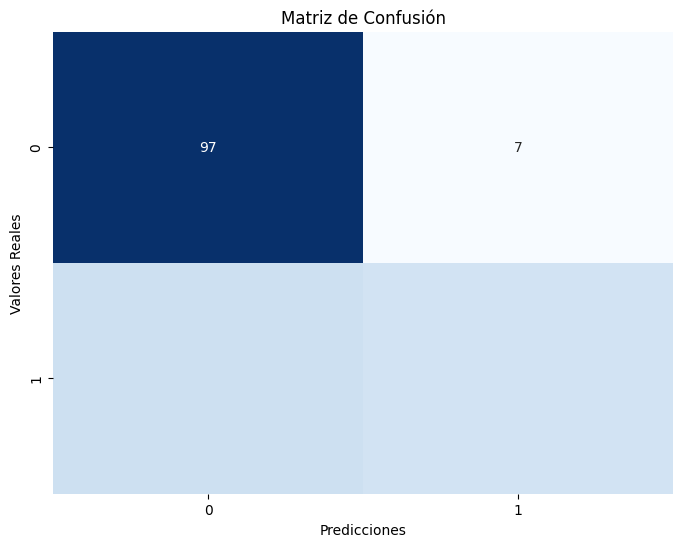

In [129]:
#Calculo de la matriz de confusion
print(confusion_matrix(y_test, predicciones2))
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones2)

# Graficar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [130]:
#Reporte de resultados
print(classification_report(y_test, predicciones2))

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85       104
         1.0       0.77      0.48      0.59        50

    accuracy                           0.79       154
   macro avg       0.78      0.71      0.72       154
weighted avg       0.78      0.79      0.77       154



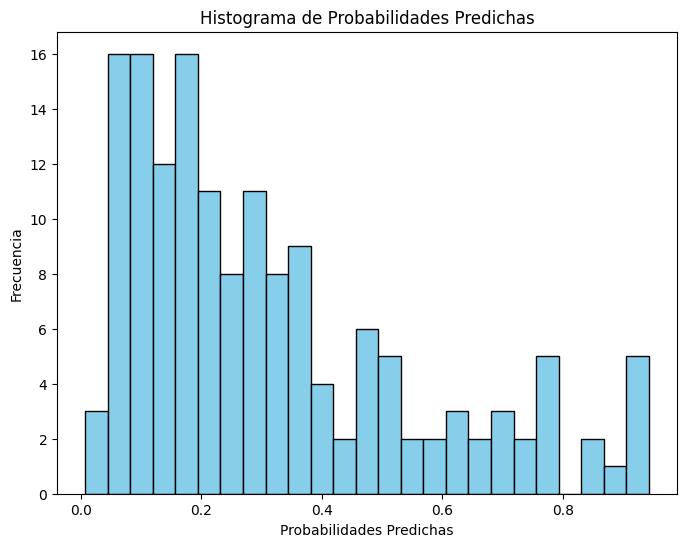

In [131]:
# Obtener las probabilidades predichas
probabilidades = modelo.predict_proba(X_test)[:, 1]

# Graficar un histograma de las probabilidades
plt.figure(figsize=(8, 6))
plt.hist(probabilidades, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Probabilidades Predichas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Probabilidades Predichas')
plt.show()